In [139]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

Theta = 5
N = 100
beta = 0.95
alpha = (1-beta)/2
u1 = -1.96
u2 = 1.96
B_p = 1000
B_np = 25000

med = 2**(1/(Theta-1))

def pareto(F):
    pass

def mean(x):
    return sum(x) / len(x);

def dover_med(x):
    mln = mean(np.log(x))
    l = 2**mln*(1-mln*np.log(2)*u2/N**0.5)
    r = 2**mln*(1-mln*np.log(2)*u1/N**0.5)
    return (l,r)

def ass_dover_omp(x):
    mln = mean(np.log(x))
    l = 1+1/mln-(mln*N**0.5)**-1*u2
    r = 1+1/mln-(mln*N**0.5)**-1*u1
    return (l,r)

def bootstr_dover_nepar(x):
    te = 1+mean(np.log(x))**-1
    delta = []
    for i in range(B_p):
        delta.append(1+mean(np.log([x[random.randint(0,N-1)] for i in range(N)]))**-1 - te)
    delta.sort()
    d_l = delta[int(alpha*B_p)]
    d_r = delta[int((1-alpha)*B_p)]
    l = te - d_r
    r = te - d_l
    return (l,r)

def bootstr_dover_par(x):
    te = 1+mean(np.log(x))**-1
    delta = []
    for i in range(B_np):
        delta.append(1+mean(np.log(scipy.stats.pareto(te-1).rvs(size=N)))**-1 - te)
    delta.sort()
    d_l = delta[int(alpha*B_np)]
    d_r = delta[int((1-alpha)*B_np)]
    l = te - d_r
    r = te - d_l
    return (l,r)


In [80]:
x = scipy.stats.pareto(Theta-1).rvs(size=N)
inters = [ass_dover_omp(x),bootstr_dover_nepar(x),bootstr_dover_par(x)]
print(x)

[1.36947043 1.18471859 1.08300896 1.25374751 1.29100714 1.98471176
 2.42795096 1.16204317 1.27243707 1.03148487 1.08113017 1.27231567
 1.12550877 1.10346597 1.48659037 1.0680135  1.3794341  1.34397112
 1.14999563 1.10903441 1.66147852 1.88180167 1.22894317 1.03331791
 1.19412767 1.07000303 1.1601465  1.11311897 2.82897598 2.07355926
 1.15345421 1.13088845 1.19870066 1.21812337 1.64324316 1.25149393
 1.00477977 1.01128285 1.03292732 3.1032727  1.10649528 1.37641148
 1.47031436 1.19165299 1.17346976 1.16920938 1.56699364 1.54376528
 1.59322492 1.10124962 2.23866015 1.25170222 1.23389592 1.1758586
 1.03795278 1.25299563 1.06576226 1.00469142 1.13334258 1.05932921
 1.1608169  1.05502691 1.00918775 1.59577373 1.46007003 1.14105269
 1.0079985  1.13806205 1.05387808 1.17632892 1.41740434 1.02189941
 1.47654468 1.00230548 1.15212817 1.31891716 1.07408211 1.23960003
 1.13672093 1.58400434 1.28378934 1.08439159 1.17255367 1.01386898
 1.09863936 1.33604947 1.20596125 1.00214119 1.44539116 2.69105

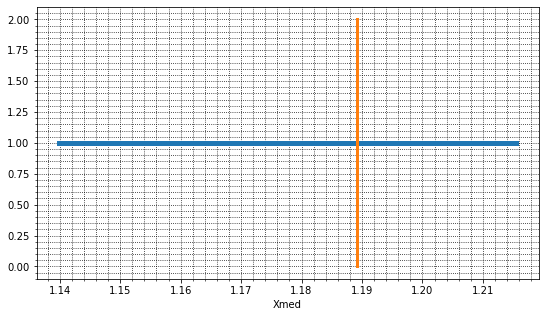

In [81]:
ys = (1,1)

fig, ax = plt.subplots(figsize=(9, 5))
labels = ["Ассимп.(ОММ)","Boorstrap (непарам.)","Boorstrap (парам.)"]
ax.minorticks_on()
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'k', linestyle = ':')
ax.set_xlabel('Xmed')
ax.plot(dover_med(x),ys,linewidth=5.0)
ax.plot((med,med),(0,2),linewidth=3.0)

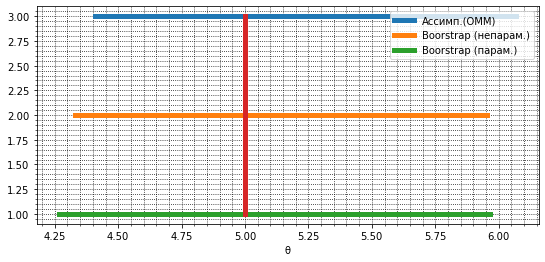

In [82]:
ys = (1,1)

fig, ax = plt.subplots(figsize=(9, 4))
labels = ["Ассимп.(ОММ)","Boorstrap (непарам.)","Boorstrap (парам.)"]
ax.minorticks_on()
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'k', linestyle = ':')
ax.set_xlabel('\u03B8')
k = len(inters)
for i in range(k):
    ax.plot(inters[i],(k-i,k-i),linewidth=5.0, label = labels[i])
ax.plot((Theta,Theta),(1,k),linewidth=5.0)
ax.legend()

In [150]:
def integrand(te, x):
    return (te-1)**N/np.prod(x**te)*np.exp(1-te)

def lev(f, l, t, args):
    s = 0
    d = 10**-4
    qx = l
    while s<t:
        s += (f(qx,*args)+f(qx+d,*args))/2*d
        qx += d
    return qx

def baes(x):
    te = 1+N/(sum(np.log(x))+1)
    c = (scipy.integrate.quad(integrand, 1., 100, args=(x))[0])**-1
    l = lev(integrand,1,alpha/c,(x,))
    r = lev(integrand,1,(1-alpha)/c,(x,))
    return te,(l,r)

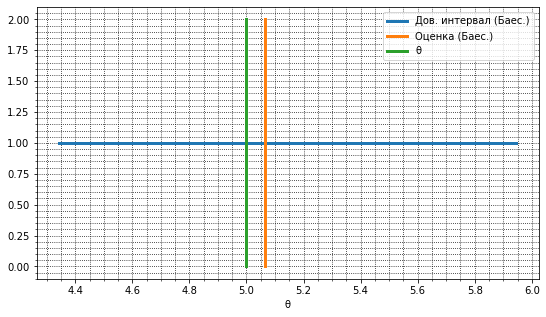

In [158]:
te,inter = baes(x)

X = [inter,(te,te),(Theta,Theta)]
Y = [ys,(0,2),(0,2)]
labels = ["Дов. интервал (Баес.)","Оценка (Баес.)","\u03B8"]

fig, ax = plt.subplots(figsize=(9, 5))
ax.minorticks_on()
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'k', linestyle = ':')
ax.set_xlabel('\u03B8')
for i in range(3):
    ax.plot(X[i],Y[i],linewidth=3.0, label = labels[i])
ax.legend()